# Logistic Regression

**Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.**

**Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.**

**Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.**

**In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).**

**The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.**

**Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.**

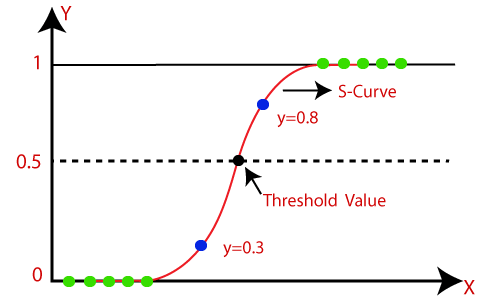

### Sigmoid function

Recall that for logistic regression, the model is represented as

$$ f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

### Cost Function 
Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* m is the number of training examples in the dataset


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$, which is the actual label

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ where function $g$ is the sigmoid function.
    * It might be helpful to first calculate an intermediate variable $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ where $n$ is the number of features, before calculating $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$
    
### Gradient for logistic regression

Recall that the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

where, parameters $b$, $w_j$ are all updated simultaniously



In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import copy
import math

## Information about dataset

Pregnancies : Number of times pregnant



Glucose :
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure :
Diastolic blood pressure (mm Hg)

SkinThickness :
Triceps skin fold thickness (mm)

Insulin :
2-Hour serum insulin (mu U/ml)

BMI :
Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction :
Diabetes pedigree function

Age :
Age (years)

Outcome :
Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [2]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot: >

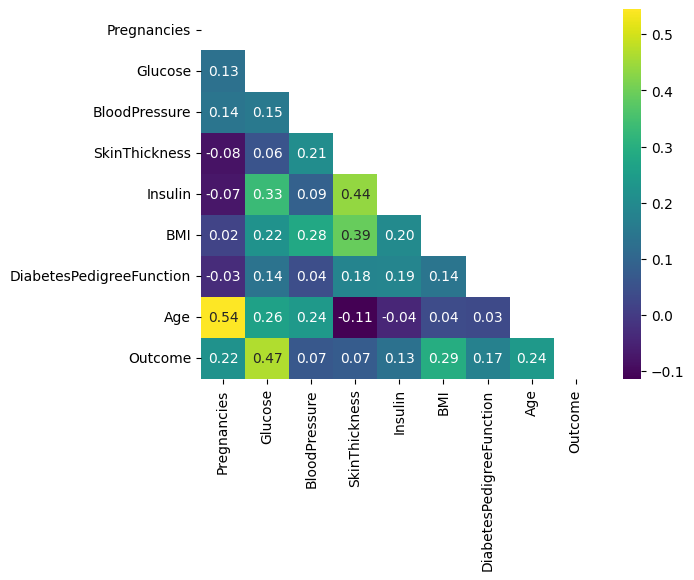

In [7]:
corr = df.corr()

mask = np.triu(corr)

sns.heatmap(corr,cmap='viridis',mask=mask,annot=True,fmt='.2f')

<AxesSubplot: xlabel='Outcome', ylabel='count'>

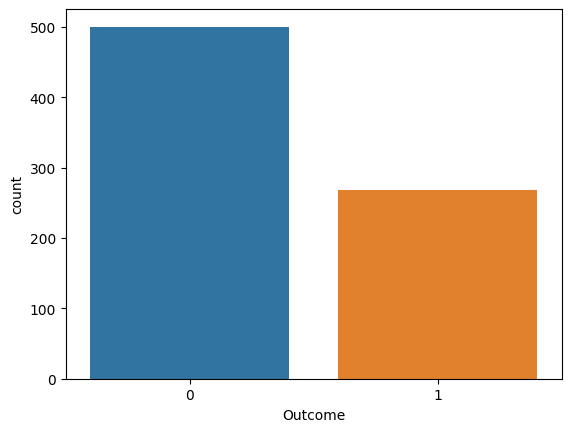

In [8]:
sns.countplot(data=df,x='Outcome')

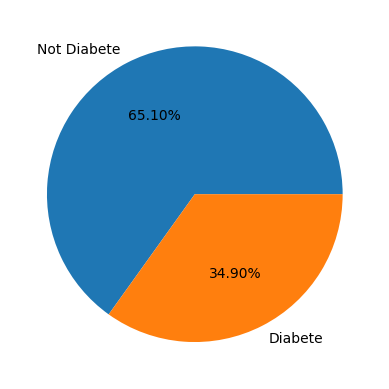

In [9]:
plt.pie(df['Outcome'].value_counts(),autopct='%.2f%%',labels=['Not Diabete','Diabete']);

In [10]:
# Split dataset
X = df.drop(['Outcome'],axis=1)
y = np.array(df['Outcome'].values)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [12]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# Build Logistic Regression Model without library

In [30]:
from sklearn.metrics import confusion_matrix

def sigmoid(z):
    return 1/(1+np.exp(-z))

# ------------------------------------------------------------------------------------------------------------------------------

def MSE(predictions,test,squared=True):
    if squared:
        return np.mean((predictions-test)**2)
    else:
        return np.sqrt(np.mean((predictions-test)**2))
    
# ------------------------------------------------------------------------------------------------------------------------------


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

class Metrics:
    def __init__(self, y_test, y_pred):
        self.y_test = y_test
        self.y_pred = y_pred
        self.tp, self.fp, self.fn, self.tn = self.calculate_confusion_matrix()
        self.accuracy = self.calculate_accuracy()
        self.precision = self.calculate_precision()
        self.recall = self.calculate_recall()
        self.f1_score = self.calculate_f1_score()
    
    def calculate_confusion_matrix(self):
        tp = np.sum(np.logical_and(self.y_test == 1, self.y_pred == 1))
        fp = np.sum(np.logical_and(self.y_test == 0, self.y_pred == 1))
        fn = np.sum(np.logical_and(self.y_test == 1, self.y_pred == 0))
        tn = np.sum(np.logical_and(self.y_test == 0, self.y_pred == 0))
        return tp, fp, fn, tn
    
    def calculate_accuracy(self):
        return (self.tp + self.tn) / (self.tp + self.fp + self.fn + self.tn)
    
    def calculate_precision(self):
        return self.tp / (self.tp + self.fp)
    
    def calculate_recall(self):
        return self.tp / (self.tp + self.fn)
    
    def calculate_f1_score(self):
        precision = self.calculate_precision()
        recall = self.calculate_recall()
        return 2 * (precision * recall) / (precision + recall)
    

    
    def plot_confusion_matrix(self):
        cm = confusion_matrix(self.y_test,self.y_pred)
        group_names = ['True Neg','False Pos','False Neg','True Pos']
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)        
        sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
         
    def plot_roc_auc(self):
        fpr, tpr, _ = roc_curve(self.y_test, self.y_pred)
        roc_auc = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    def get_all_metric_values(self):
        # Print the calculated metrics
        print("TP:", self.tp)
        print("FP:", self.fp)
        print("FN:", self.fn)
        print("TN:", self.tn)
        print("Accuracy:", self.accuracy)
        print("Precision:", self.precision)
        print("Recall:", self.recall)
        print("F1 Score:", self.f1_score)
        
    def get_all_prediction_results(self):
        self.get_all_metric_values()
        self.plot_confusion_matrix()
        self.plot_roc_auc()

    

        
# ------------------------------------------------------------------------------------------------------------------------------

class LogisticRegressionWL:
    def __init__(self,LR=0.01,n_iters=1000):
        self.LR = LR
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0       
        for _ in range(self.n_iters):
            linear_pred = np.dot(X,self.weights)+self.bias
            predictions = sigmoid(linear_pred)
            
            dw = (1/n_samples) * np.dot(X.T,(predictions-y))
            db = (1/n_samples) * np.sum(predictions-y)
            
            self.weights = self.weights - self.LR * dw
            self.bias = self.bias - self.LR * db
            
    def predict(self,X):
        linear_pred = np.dot(X,self.weights)+self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [1 if y>=0.5 else 0 for y in y_pred]
        class_pred = np.array(class_pred)
        return class_pred
    
    

In [31]:
# 
log = LogisticRegressionWL()
log.fit(X_train,y_train)

In [32]:
y_pred = log.predict(X_test)

TP: 3
FP: 1
FN: 52
TN: 98
Accuracy: 0.6558441558441559
Precision: 0.75
Recall: 0.05454545454545454
F1 Score: 0.10169491525423728


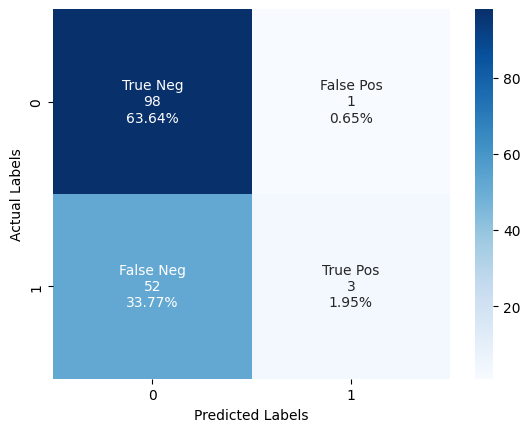

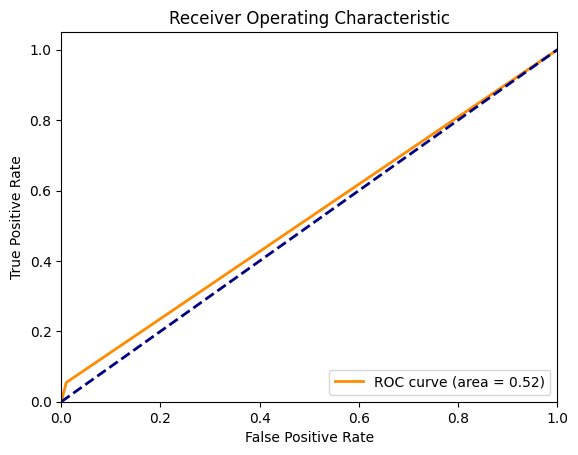

In [33]:
# Create an instance of the Metrics class
metrics = Metrics(y_test, y_pred)

metrics.get_all_prediction_results()


# Logistic Regression with sklearn (solver='lbfgs')

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred2 = log_reg.predict(X_test)

TP: 37
FP: 21
FN: 18
TN: 78
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682


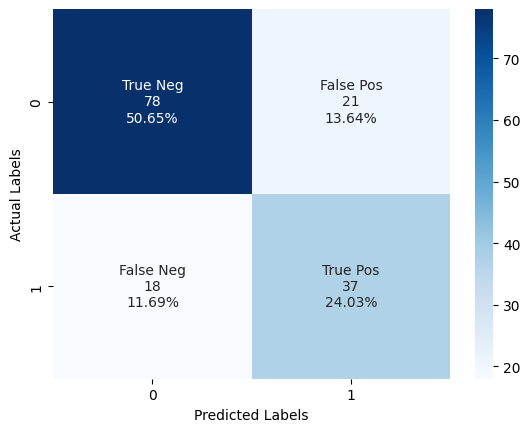

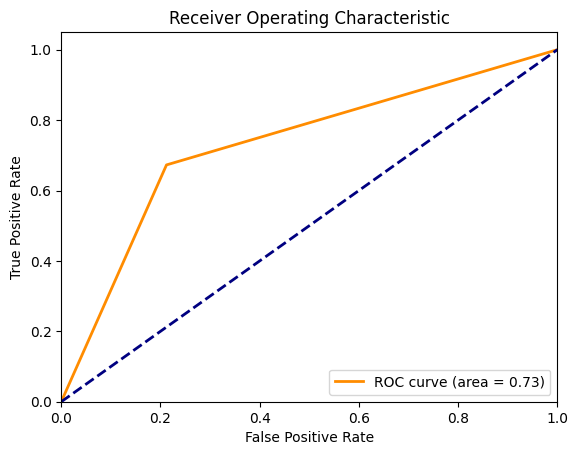

In [36]:
# Create an instance of the Metrics class
metrics2 = Metrics(y_test, y_pred2)

metrics2.get_all_prediction_results()


# Build a new model with a higher the number of iteration

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(solver='lbfgs', max_iter=5000,verbose=1)
log_reg2.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=5000, verbose=1)

In [38]:
y_pred3 = log_reg.predict(X_test)

TP: 37
FP: 21
FN: 18
TN: 78
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682


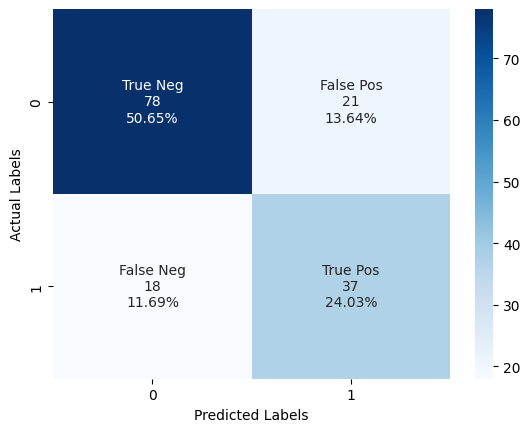

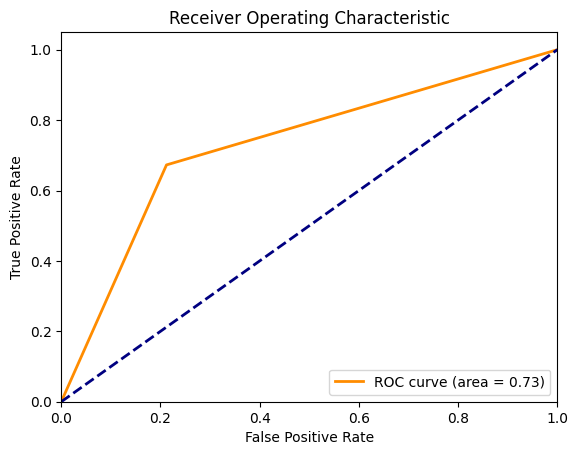

In [39]:
# Create an instance of the Metrics class
metrics3 = Metrics(y_test, y_pred3)

metrics3.get_all_prediction_results()


# Predict any value from test dataset

In [67]:
rand_num = np.random.randint(0,len(X_test)-1)
rand_num

45

In [68]:
test_values = X.iloc[rand_num,:].values
weights = log_reg2.coef_[0]
print(f"Feature values of any point : {test_values}")
print(f"Weights for model3 : {weights}")

Feature values of any point : [  0.    180.     66.     39.      0.     42.      1.893  25.   ]
Weights for model3 : [ 0.06439026  0.03409647 -0.01388056  0.00329364 -0.00180358  0.10259306
  0.62659359  0.03708443]


In [69]:
test_pred = np.dot(test_values,weights)
test_pred_sigmoid = sigmoid(test_pred)
print(f"Predicted result for the 3th index of X : {test_pred_sigmoid}")

Predicted result for the 3th index of X : 0.9999922813376475


In [71]:
y_pred3[rand_num]

1